# 데이터 불러오기

In [ ]:
# 경고문 끄기
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# NYC_taxi.csv 전체 데이터에서 500,000개(0~499,999번째 row) 데이터만 추출

filepath = ''
df = pd.read_csv(filepath, nrows=500000)
df.shape

(500000, 8)

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


• key: pickup_datetime 칼럼과 값이 동일해 보인다. 아마 데이터베이스 테이블의 고유 ID로 사용했을 것이다. 이 칼럼은 제거해도 괜찮다.

• fare_amount: 운행을 마친 후 지불한 요금. 모델이 예측할 목표 변수다.

• pickup_datetime: 승객이 승차한 날짜(년, 월, 일)와 시각(시, 분, 초)

• pickup_longitude, pickup_latitude: 승차 위치(위도, 경도)

• dropoff_longitude, dropoff_latitude: 하차 위치(위도, 경도)

• passenger_count: 승객 수

# 위치 데이터 시각화

In [4]:
# 뉴욕시의 경도 범위
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# 뉴욕시의 위도 범위
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

In [4]:
# 뉴욕시의 경도, 위도 범위에 속하는 데이터만 남기기

for long in ['pickup_longitude', 'dropoff_longitude']:
    pass

for lat in ['pickup_latitude', 'dropoff_latitude']:
    pass

In [5]:
landmarks = {'JFK Airport': (-73.78,40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # 차트 크기를 설정한다
    if points == 'Pickup':
        # 승차 위경도 시각화
        plt.plot(df.pickup_longitude, df.pickup_latitude, '.', markersize=1)
    else:
        # 하차 위경도 시각화
        plt.plot(df.dropoff_longitude, df.dropoff_latitude, '.', markersize=1)
    
    # 랜드마크 시각화
    for region, (long, lat) in landmarks.items():
        plt.plot(long, lat, '*', markersize=15, alpha=1, color='r')
        plt.annotate(region, (long+0.005, lat+0.0005), color='r')

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

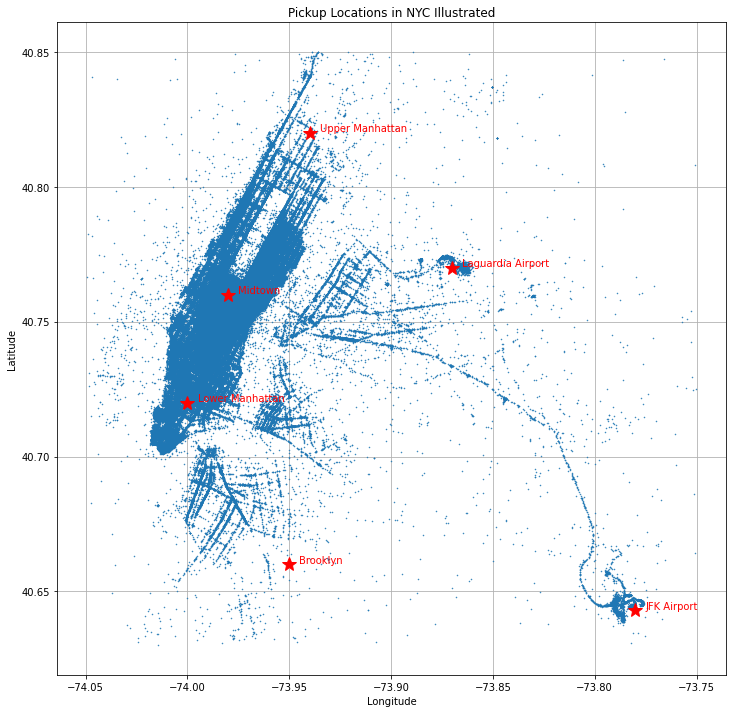

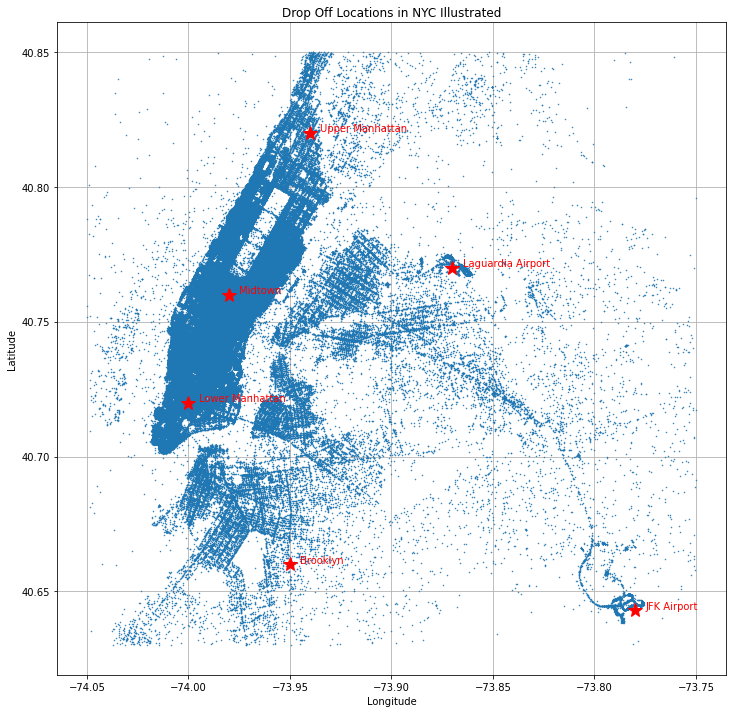

In [6]:
plot_lat_long(df, landmarks, points='Pickup')
plot_lat_long(df, landmarks, points='Drop Off')

# 결측값 및 이상치 처리

## 결측값

In [11]:
# 결측값 확인


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64

In [12]:
# 결측치 제거


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64

## 이상치

In [13]:
# 데이터 요약 - 각 컬럼에 이상치가 있는지 탐색해보세요
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445,2011.739129,6.268617,15.684239,3.042020,13.510843
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391,1.860897,3.437798,8.681092,1.949243,6.511596
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


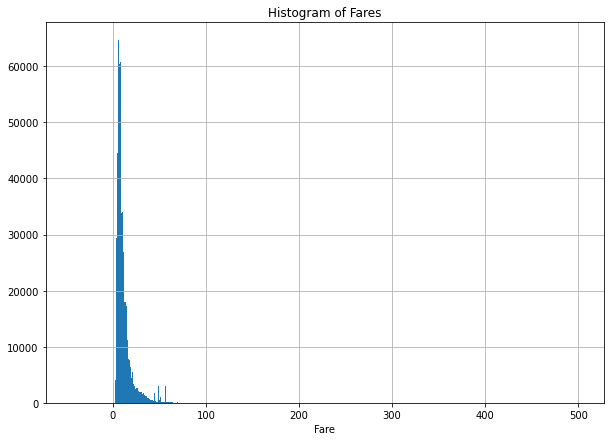

In [14]:
# fare_amount 히스토그램 그리기
df.fare_amount.hist(bins=500, figsize=(10,7))

plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

In [ ]:
# df 데이터프레임에서 fare_amount 0~100 범위의 데이터만 추출


In [15]:
df.describe()['fare_amount']

count    499760.000000
mean         11.300049
std           9.400215
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         100.000000
Name: fare_amount, dtype: float64

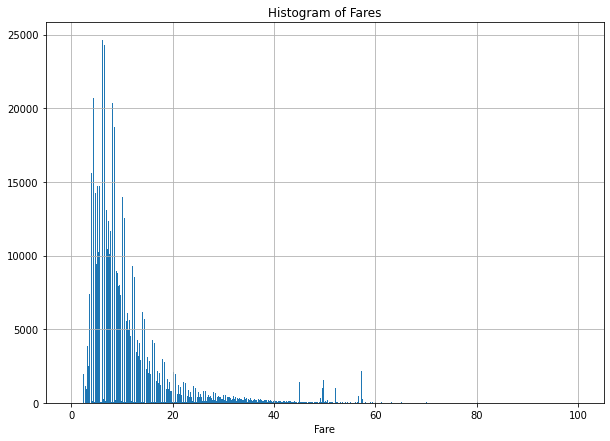

In [16]:
# fare_amount 히스토그램 재확인
df.fare_amount.hist(bins=500, figsize=(10,7))

plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

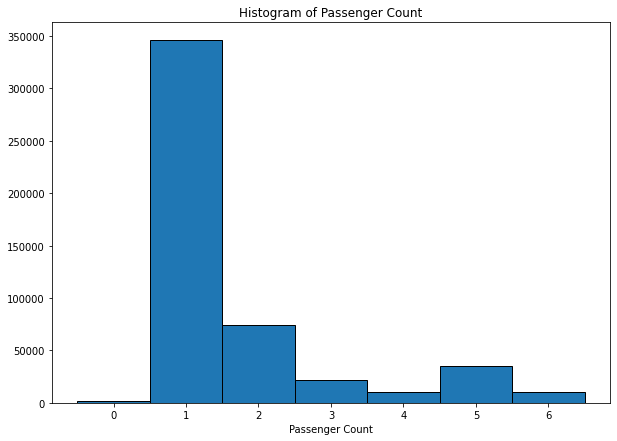

In [17]:
# 승객 수 히스토그램
df['passenger_count'].hist(bins=np.arange(8)-0.5, 
                           ec='black', 
                           grid=False,
                           figsize=(10, 7))
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [18]:
# 승객 수 0명 최빈값(mode)으로 대체


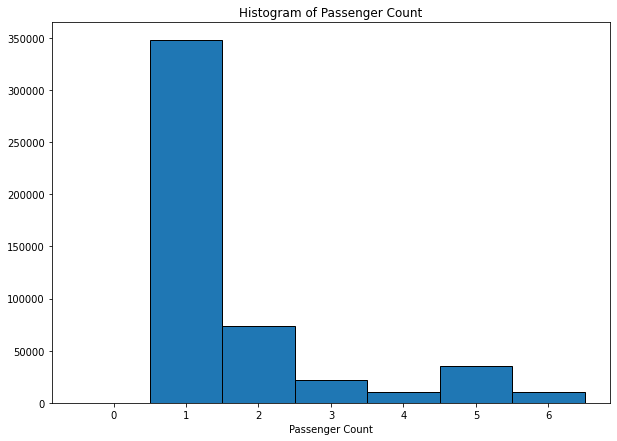

In [22]:
# 승객 수 히스토그램 확인
df['passenger_count'].hist(bins=np.arange(8)-0.5, 
                           ec='black', 
                           grid=False,
                           figsize=(10, 7))
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

# 특징 공학(feature engineering)

* pickup_datetime에 담겨있는 시간 변수를 분리하여 특성 생성

## 시간 관련 변수

In [26]:
# pickup_datetime 시간 변수(datetime)로 변환하기


In [30]:
# year(년), month(월), day(일), day_of_week(요일), hour(시간) 변수 생성


In [31]:
# year, month, day, day_of_week, hour 변수 확인


,year,month,day,day_of_week,hour
0,2009,6,15,0,17
1,2010,1,5,1,16
2,2011,8,18,3,0
3,2012,4,21,5,4
4,2010,3,9,1,7


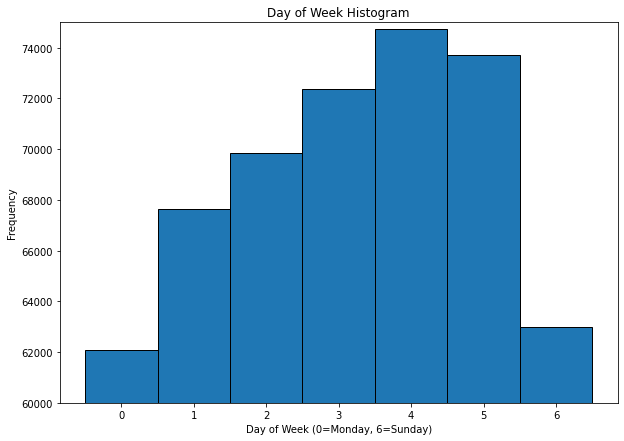

In [32]:
# day_of_week 히스토그램 그리기
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, 
                            ec='black', 
                            ylim=(60000,75000),
                            figsize=(10, 7))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

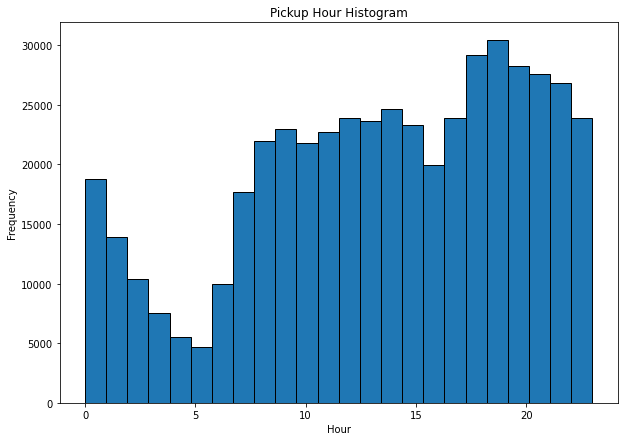

In [33]:
# hour 히스토그램 그리기
df['hour'].plot.hist(bins=24, 
                     ec='black',
                     figsize=(10, 7))
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

In [34]:
# pickup_datetime, key column 제거


In [35]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


## 시간과 관련된 새로운 변수 만들어보기

In [36]:
# 새로운 변수를 만들어보세요.


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,late_night
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0


## 위치 특징 변수
* 위경도는 "거리" 특성을 반영하지 못함
<img src=https://slidesplayer.org/slide/16642119/96/images/16/2%EC%B0%A8%EC%9B%90+%EC%9C%A0%ED%81%B4%EB%A6%AC%EB%93%9C+%EA%B1%B0%EB%A6%AC+%EA%B5%AC%ED%95%98%EB%8A%94+%EB%B0%A9%EB%B2%95.jpg width="700">

In [37]:
# 유클리드 거리 계산 함수를 만들어 보세요.

def euc_distance(long1, lat1, long2, lat2):
    pass

In [38]:
# euc_distance 함수로 distance 변수 만들기



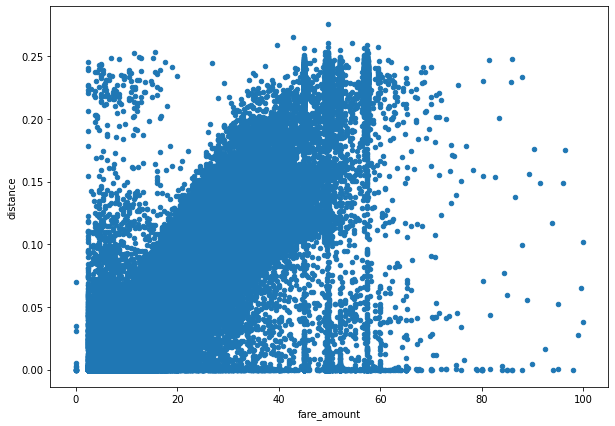

In [39]:
# fare_amount, distance 산점도 그리기
df.plot.scatter('fare_amount', 'distance', figsize=(10,7))
plt.show()

In [40]:
# euc_distance 함수로 pickup_dist_{airport} 변수 만들기 
# - 출발(lat, long) 지점과 공항과의 거리 변수 추가: pickup_dist_{공항이름}
# - 도착(lat, long) 지점과 공항과의 거리 변수 추가: dropoff_dist_{공항이름}

airports = {'JFK':(-73.78, 40.643),
            'Laguardia_Airport':(-73.87, 40.77),
            'Newark_Airport':(-74.18, 40.69)
            }



In [41]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK,dropoff_dist_JFK,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228


# 변수 스케일링(Feature Scaling)

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화(Standardization)
    -  데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
- 정규화(Normalization)
    - 서로 다른 Feature의 크기를 통일하기 위해 크기를 변환
    - 모두 최소 0 , 최대 1의 값으로 변환하는 것 -> 동일한 크기 단위로 변수 비교하기 위해
    
[참고] https://rueki.tistory.com/64

In [42]:
# df dataframe 복사
df_prescaled = df.copy()

# fare_amount를 제거한 dataframe df_scaled 생성
df_scaled = df.drop(['fare_amount'], axis=1)

In [43]:
# 데이터 표준화
from sklearn.preprocessing import scale


df_scaled

array([[ 3.91689619, -1.12822655,  4.1511158 , ..., -1.90111909,
         3.49446065,  3.62141698],
       [-1.20346407, -1.51022673, -0.14605462, ..., -0.07629645,
        -1.40332866,  0.14437401],
       [-0.21032223,  0.39546447, -0.51983833, ...,  0.43853778,
        -0.13732977, -0.51913813],
       ...,
       [-0.24452018, -0.96453398,  2.43821619, ..., -1.51693674,
        -0.43436321,  1.99349034],
       [ 0.03180627,  0.21398724,  0.13750387, ..., -0.46072438,
         0.03775849,  0.20133781],
       [-0.32973181, -1.0951219 , -0.25531159, ...,  0.5752536 ,
        -0.53136597, -0.50822114]])

In [44]:
# 표준화한 dataframe과 기존 df의 fare_amount와 결합하여 dataframe 만들기


df = df_scaled.copy()
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK,dropoff_dist_JFK,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport,fare_amount
0,3.916896,-1.128227,4.151116,-1.365537,-0.526888,-1.469611,-0.078187,-0.078219,-1.560801,0.535442,-0.646405,-3.957854,-4.628070,-2.321151,-1.901119,3.494461,3.621417,4.5
1,-1.203464,-1.510227,-0.146055,1.083475,-0.526888,-0.932852,-1.531625,-1.230176,-1.047515,0.381408,1.292368,0.651855,0.631996,1.791541,-0.076296,-1.403329,0.144374,16.9
2,-0.210322,0.395464,-0.519838,-0.020874,0.239932,-0.396092,0.503188,0.267369,-0.020945,-2.083145,-0.529455,0.300110,0.425078,0.010540,0.438538,-0.137330,-0.519138,5.7
3,-0.341270,-0.677271,-0.529984,0.243605,-0.526888,0.140667,-0.659562,0.612956,1.005625,-1.467007,-0.207528,0.018578,0.557964,0.400941,0.412867,-0.482410,-0.456748,7.7
4,0.226261,0.652445,0.559839,1.145221,-0.526888,-0.932852,-0.950250,-0.769393,-1.047515,-1.004903,-0.369533,0.017033,0.033960,-0.590553,-0.964083,0.320629,0.773758,5.3


# 케라스로 모델 만들기

## 입력변수 & 목표변수

In [45]:
# X, y 입력변수, 목표변수 만들기

X = 
y = 

## 데이터 분할

In [46]:
# train:test - 8:2 데이터 분할
# train:val - 8:2 데이터 분할
from sklearn.model_selection import train_test_split



## 모델 만들고 학습하기

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
# 케라스 예측 모델 만들기



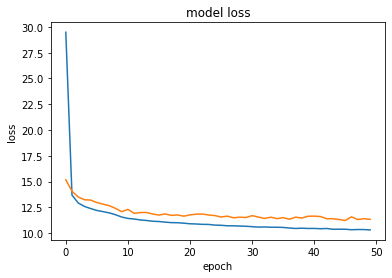

In [49]:
# epochs를 늘려서 학습한 후 loss가 변화는 과정을 시각화 해보세요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 모델 평가하기

In [50]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 3.19
Test RMSE: 3.28


### 랜덤으로 결과 비교하기

In [51]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
    idx = sample.index[0]

    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))

    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))

In [52]:
predict_random(df_prescaled, X_test, model)

Trip Details: Friday, 21:00hrs
Actual fare: $7.70
Predicted fare: $7.89
RMSE: $0.19


In [53]:
predict_random(df_prescaled, X_test, model)

Trip Details: Thursday, 8:00hrs
Actual fare: $8.10
Predicted fare: $8.47
RMSE: $0.37
